In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV

diabetes = pd.read_csv('/Users/emilyvincett/downloads/diabetes.csv')
diabetes

X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

#Split data into training & test data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
diabetes
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
366,6,124,72,0,0,27.6,0.368,29
301,2,144,58,33,135,31.6,0.422,25
382,1,109,60,8,182,25.4,0.947,21
140,3,128,78,0,0,21.1,0.268,55


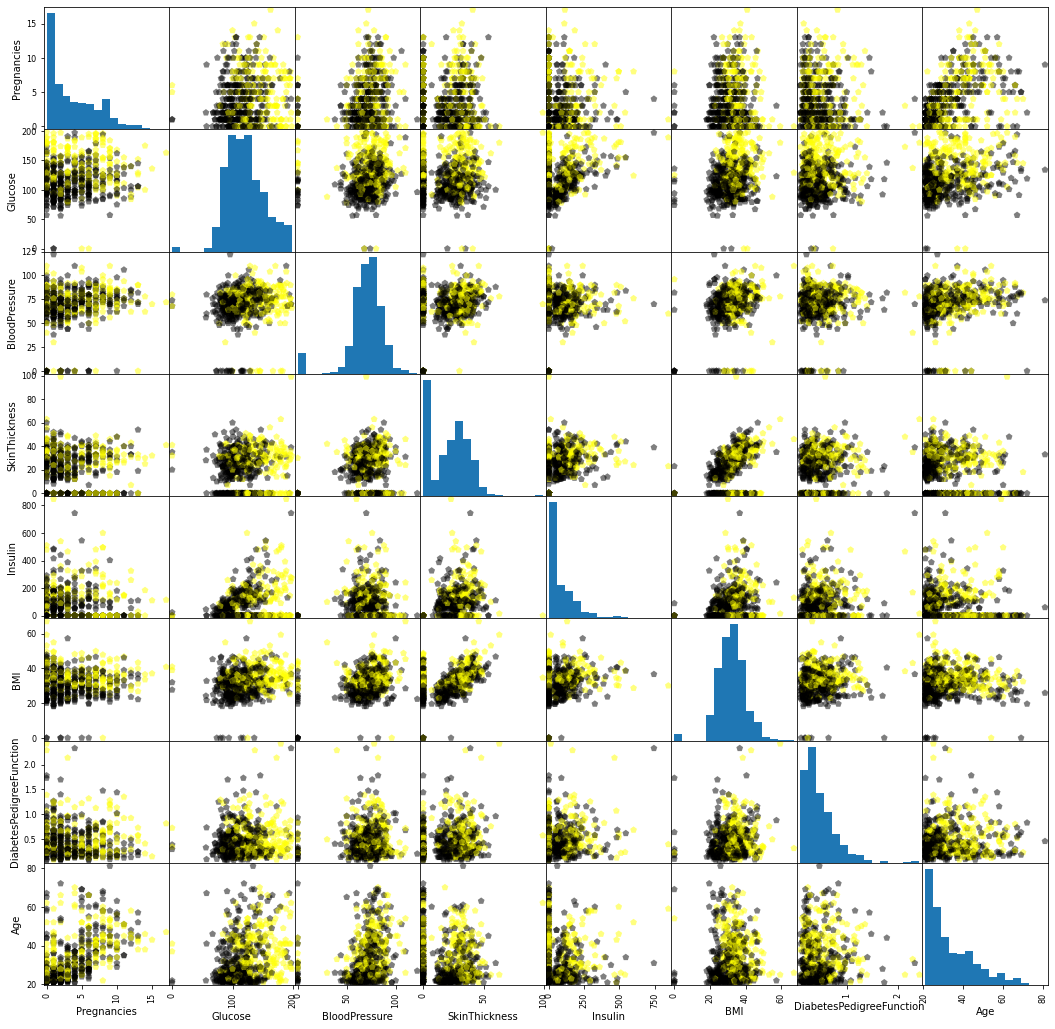

In [12]:
from matplotlib import cm
from pandas.plotting import scatter_matrix


#Scatter Matrix
cmap= cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train,c=y_train, marker='p', s=50, hist_kwds={'bins':15},figsize=(18,18),cmap=cmap)




In [10]:
#KNN Classifier 

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import roc_auc_score,f1_score



#Call the classifier and establish grid values 
knn = KNeighborsClassifier()
grid_values = {'n_neighbors':[0,6],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute'],
              'leaf_size':[np.arange(20,40,5)],
              'p':[1,2]}
grid_knn_auc = GridSearchCV(knn, param_grid=grid_values, n_jobs=-1)
grid_knn_auc.fit(X_train,y_train)
predicted_lables = grid_knn_auc.predict(X_test)

print('Test score is %.3f'%(grid_knn_auc.score(X_test,y_test)))
print("Test best score is %.3f" %(grid_knn_auc.best_score_))
print("Test best parameters {}".format(grid_knn_auc.best_params_))
print ('Model F1 Score %.3f' %(f1_score(y_test,predicted_lables, average='macro')))

Test score is 0.760
Test best score is 0.733
Test best parameters {'algorithm': 'brute', 'leaf_size': array([20, 25, 30, 35]), 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Model F1 Score 0.713


In [6]:
# Logistics regression - used for classification problems where target values are binary or multiclass categorical. 
# Passes a weighted sum of inputs through a logistics function which restrict output to b/w 0 & 1. 
# As inputs get larger the functions output tends towards 1 and vice-versa

from sklearn.linear_model import LogisticRegression 

#Call the classifier 
logreg = LogisticRegression(random_state=0)

grid_value = {'penalty':['l2','elasticnet'],
             'C':[1,3,5,7,10],
             'class_weight':['dict','balanced'],
             'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
             'multi_class':['auto','ovr','multinomial'],
             'max_iter':[100]}

grid_logreg_auc = GridSearchCV(logreg, param_grid=grid_value, scoring='roc_auc',n_jobs= -1)
grid_logreg_auc.fit(X_train,y_train)
d_function = grid_logreg_auc.decision_function(X_test)

print('Model AUC Score is %.3f'%(roc_auc_score(y_test,d_function)))
print('Model Best Parameters are {}'.format(grid_logreg_auc.best_params_))
print('Model Best Score is %.3f'%(grid_logreg_auc.best_score_))

Model AUC Score is 0.859
Model Best Parameters are {'C': 5, 'class_weight': 'dict', 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
Model Best Score is 0.824


In [8]:
# LSVM passed the feature vectors through a linear function with coverts the into +1, -1 

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

#Transform the X variables
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Call the classifier
lsvc = SVC(random_state=0)



#Set the parameters for GridSearchCV
grid_values = {'C':[1,10,30],
              'kernel':['linear','poly','rbf','sigmoid'], #
              'degree':[1,3,5,8], # degree for the poly setting of the kernel
              'gamma':['scale','auto'],
              'class_weight':['dict','balanced'],
              'max_iter':[1000]} #Weights applied to each class either uniform(balanced)

#Fit the classifier to the training data
grid_lsvc_auc = GridSearchCV(lsvc, param_grid=grid_values, n_jobs= -1)
grid_lsvc_auc.fit(X_train_scaled,y_train)
d_function = grid_lsvc_auc.decision_function(X_test)

print('Model AUC %.3f' %(roc_auc_score(y_test,d_function)))
print('Model Best Score %.3f'%(grid_lsvc_auc.best_score_))
print('Model Best Parameters {}'.format(grid_lsvc_auc.best_params_))

Model AUC 0.837
Model Best Score 0.754
Model Best Parameters {'C': 1, 'class_weight': 'balanced', 'degree': 1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 1000}


In [9]:
#Evaluation 

from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train_scaled,y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test,y_majority_predicted)

print('Dummy Score %.3f'%(dummy_majority.score(X_train,y_train)))
print('Most frequent dummy class\n',confusion)

Dummy Score 0.642
Most frequent dummy class
 [[130   0]
 [ 62   0]]


<IPython.core.display.Javascript object>


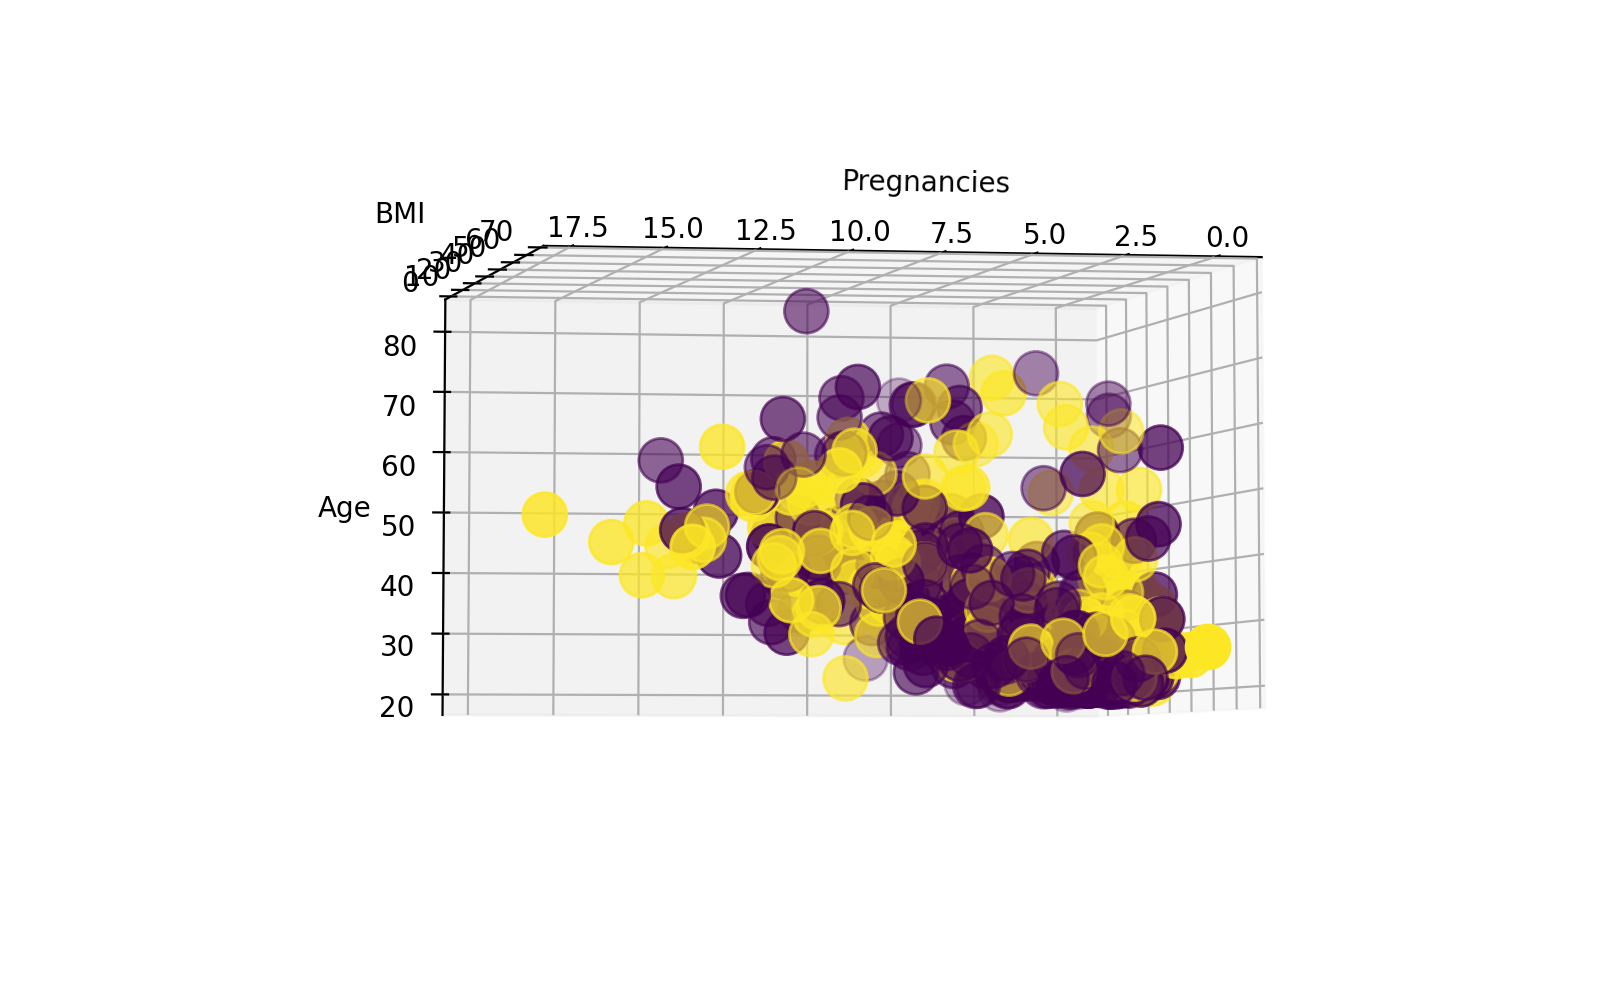

In [16]:
%matplotlib notebook
#3D Graph 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(X_train['Pregnancies'],X_train['BMI'],X_train['Age'],c=y_train,marker='o',s=250)
ax.set_xlabel('Pregnancies')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

plt.show()